## Neo4j Code to load data, nodes, properties and relationships

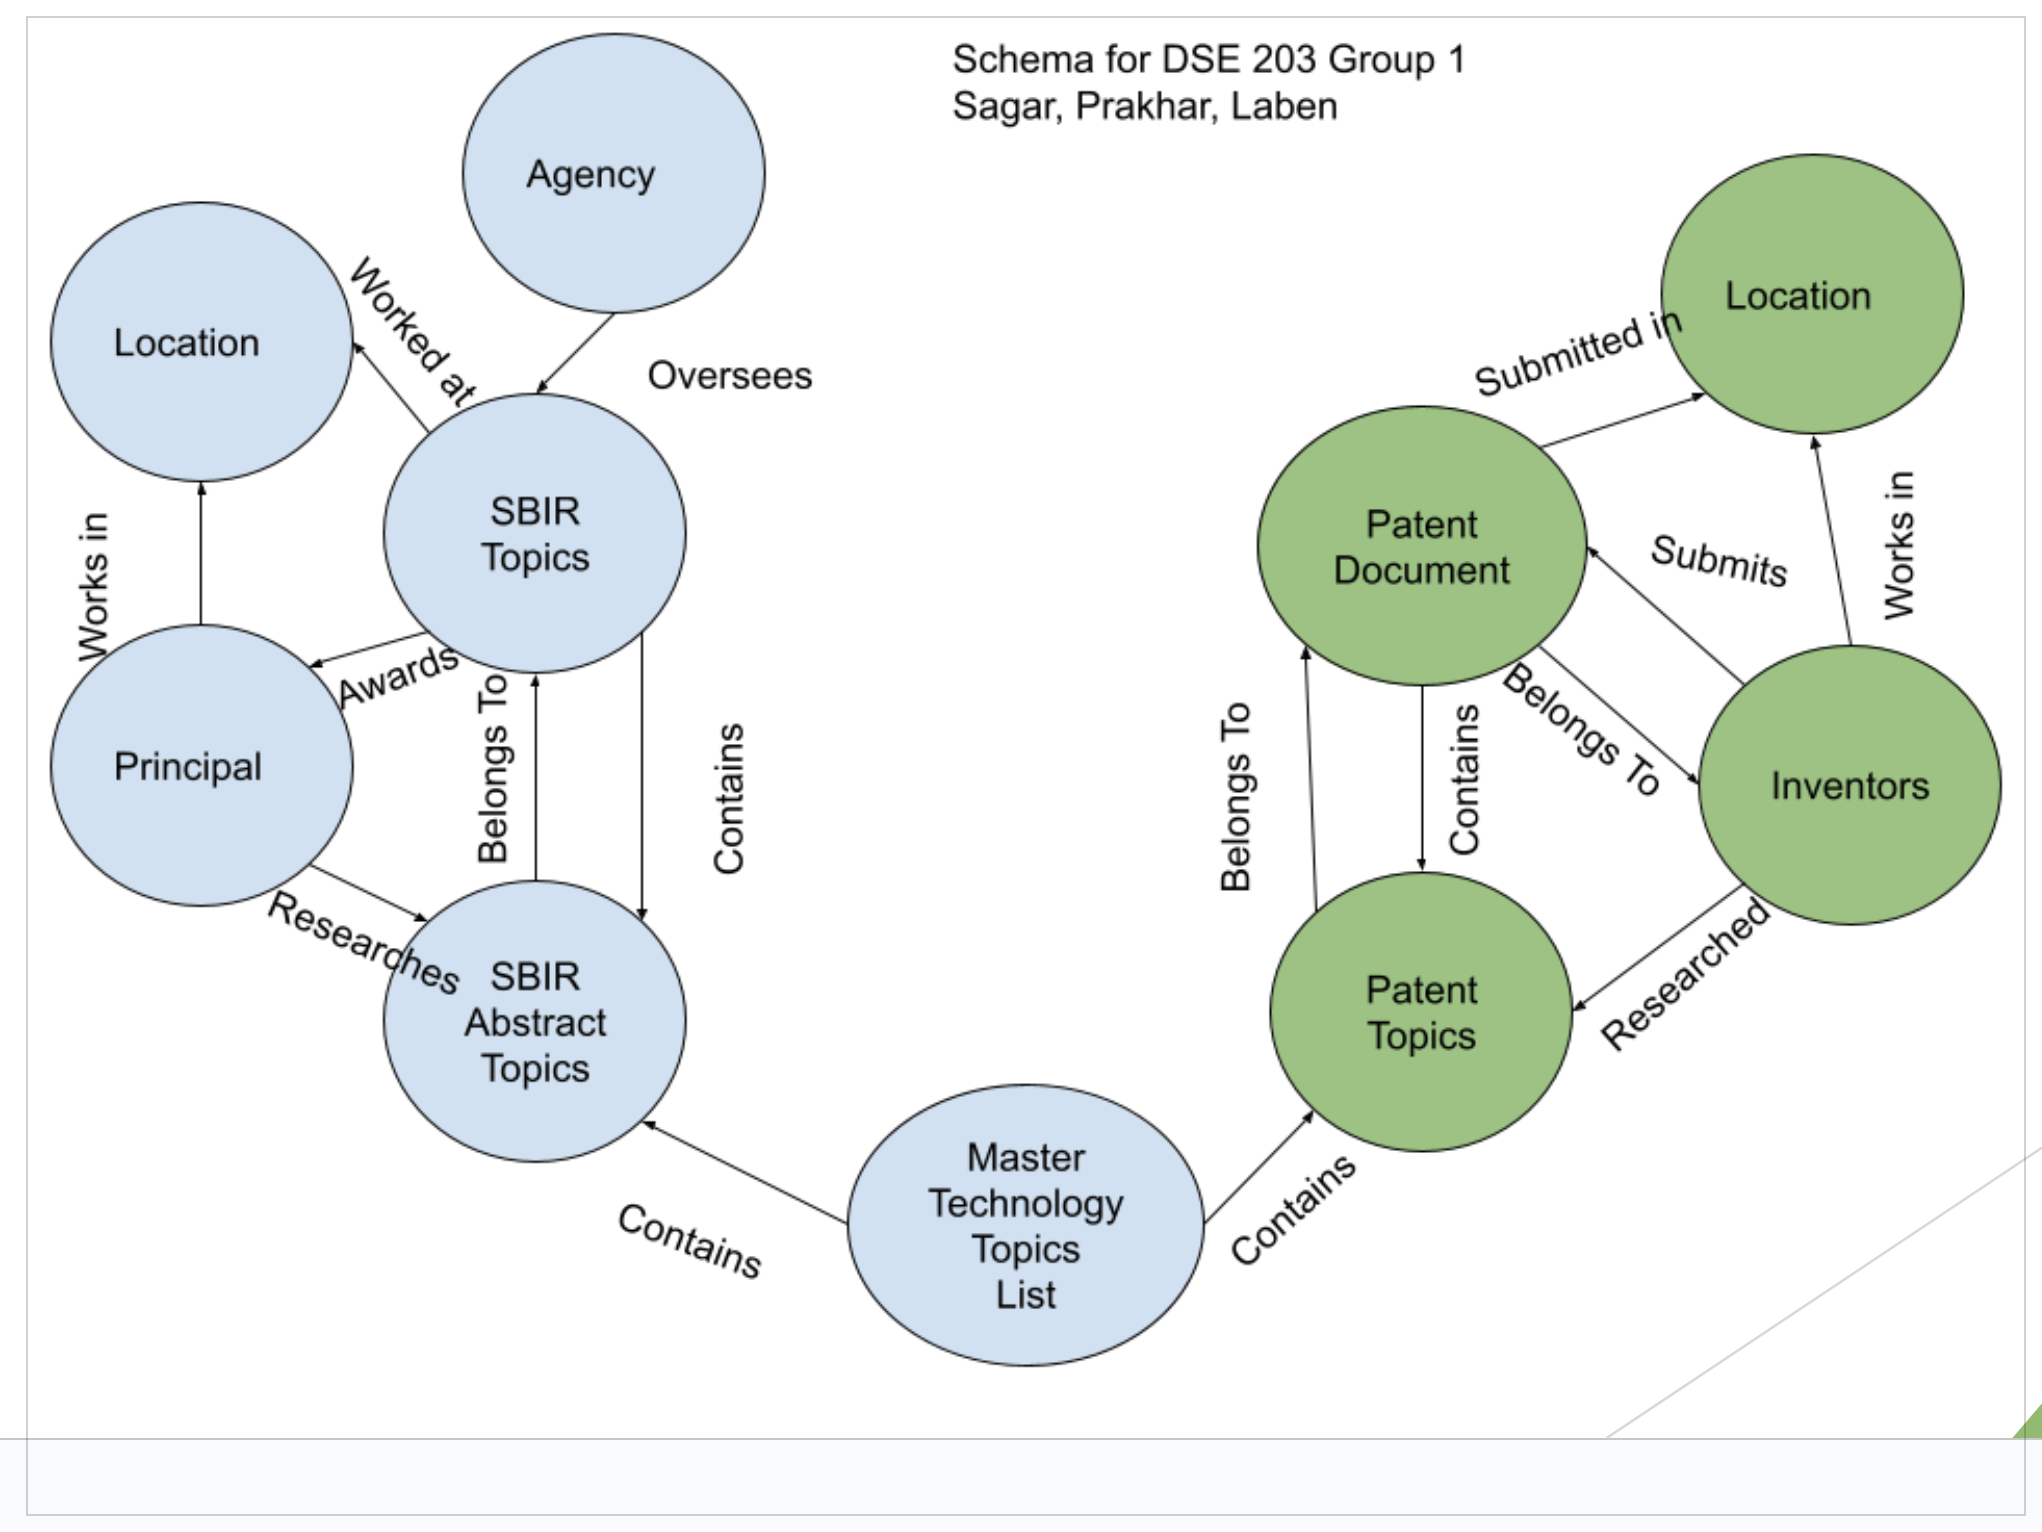

In [1]:
## 1- Install neo4j Desktop
## 2- Create local database with authentication (user name /password)
## 3- Export csv from relational database & xml file (not needed if already csb there)
## 4- Copy Data files to neo4j data directory
##/Users/prakhar/Library/Application Support/Neo4j Desktop/Application/neo4jDatabases/database-<your-db-id>/installation-4.3.7/import/
## my local neo4j directory 
###ls "/Users/prakhar/Library/Application Support/Neo4j Desktop/Application/relate-data/dbmss/dbms-c1b4f9c3-baa6-45d6-a13c-31ec4ba4c393/import"
#5 cypher queries

In [2]:
## install 
#pip install py2neo

In [3]:
import pandas as pd
from pandas import json_normalize
import ast
from ast import literal_eval
from py2neo import Graph
import spacy

In [4]:
# Connect to your Neo4j database
graph = Graph("bolt://localhost:7690", auth=("neo4j", "Welcome19#"))

#7690

In [5]:
# path to your SBIR Excel file
filename_sbir = './preprocessed_files/sbir_1k_sample.csv'

# Read the Excel file into a pandas DataFrame
df_sbir = pd.read_csv(filename_sbir)
#df_sbir.rename(columns={'Agency Tracking Number': 'id_Agency Tracking Number'}, inplace=True)
df_sbir['key'] = df_sbir.index
df_sbir.head(5)

,Unnamed: 0,Company,Award Title,Agency,Branch,Phase,Program,Agency Tracking Number,Contract,Proposal Award Date,...,Contact Email,PI Name,PI Title,PI Phone,PI Email,RI Name,RI POC Name,RI POC Phone,abstract_entities,key
0,150881,"Mellwood Laboratorytories,",High-Power Pulsed Laser Diode Driver Utilizing...,Department of Defense,Air Force,Phase I,SBIR,28130,NaN,NaN,...,NaN,Eric S. Harmon,NaN,(317) 426-3662,NaN,NaN,NaN,NaN,switch high-power power driver electrical puls...,0
1,159895,Crystallume/edi,A SINGLE CRYSTAL DIAMOND ULTRAVIOLET DETECTOR ...,Department of Energy,NaN,Phase I,SBIR,14551,NaN,NaN,...,NaN,Maurice Landstrass,Principal Investigator,() -,NaN,NaN,NaN,NaN,detectors TESTED use uv laser phase research p...,1
2,161341,Sunburst Recovery Inc,ELECTROMAGNETIC GAGE MEASUREMENT OF COUPLING I...,Department of Defense,Defense Advanced Research Projects Agency,Phase I,SBIR,15254,NaN,NaN,...,NaN,Morris Young,Principal Investigator,(415) 833-0553,NaN,NaN,NaN,NaN,electromagnetic gage benefits/potential small-...,2
3,155588,INFINIA CORPORATION,A STIRLING CRYOCOOLER FOR MRI CRYOSTAT SHIELD ...,Department of Health and Human Services,NaN,Phase II,SBIR,19258,NaN,NaN,...,NaN,Peter Riggle,NaN,(509) 375-4000,NaN,NaN,NaN,NaN,LINEAR MOTOR DRIVEN COMPRESSOR cost FUTURE SYS...,3
4,106795,"BANYAN BIOMARKERS, INC.",Novel Biomarkers for Stroke Injury,Department of Health and Human Services,National Institutes of Health,Phase I,SBIR,NS051039,1R43NS051039-01,NaN,...,cellis@banyanbio.com,MONIKA OLI,NaN,(386) 418-1632,MOLI@BANYANBIO.COM,NaN,NaN,NaN,event information detection recovery function ...,4


In [6]:
#df_sbir['Award Amount'].sum()
print(df_sbir.dtypes)
#df_sbir['Award Amount'] = df_sbir['Award Amount'].astype(float)

Unnamed: 0                                   int64
Company                                     object
Award Title                                 object
Agency                                      object
Branch                                      object
Phase                                       object
Program                                     object
Agency Tracking Number                      object
Contract                                    object
Proposal Award Date                         object
Contract End Date                           object
Solicitation Number                         object
Solicitation Year                          float64
Solicitation Close Date                     object
Proposal Receipt Date                       object
Date of Notification                        object
Topic Code                                  object
Award Year                                   int64
Award Amount                                object
Duns                           

In [7]:
selected_columns1 = ['key',
                     'Agency Tracking Number', 'Company', 'Branch', 'Award Title', 'Agency', 'Company Website', 'Contract', 'Proposal Award Date', 'Contract End Date', 'Solicitation Number', 'Solicitation Year',
                     'Solicitation Close Date', 'Proposal Receipt Date', 'Date of Notification', 'Topic Code', 'Award Year', 'Award Amount',
                     'PI Name', 'PI Title', 'PI Phone', 'PI Email', 'RI Name', 'RI POC Name', 'RI POC Phone','Address1','Address2', 'City', 'State', 'Zip',
                     'HUBZone Owned', 'Socially and Economically Disadvantaged','Women Owned'
                    ]

selected_columns2 = ['key', 'abstract_entities']
# Remove leading/trailing whitespaces
selected_columns1 = [col.strip() for col in selected_columns1]
selected_columns2 = [col.strip() for col in selected_columns2]

df_sbirs = df_sbir[selected_columns1]

df_sbirent = df_sbir[selected_columns2]


df_sbirs.to_csv('./preprocessed_files/neo4j_sbir_main.csv', index=False)

In [8]:
df_source_sbir = df_sbirent
# Convert the string representation to a list
#(need to update)
#df_source_sbir['abstract_entities'] = df_source_sbir['abstract_entities'].apply(ast.literal_eval)

# Explode the 'abstract_entities' column  (need to update)
#(need to update)
df_exploded_sbir = df_source_sbir.explode('abstract_entities')
#df_exploded_sbir = df_source_sbir
# Display the resulting DataFrame
print(df_exploded_sbir)

#df_exploded_sbir.to_csv('./preprocessed_files/neo4j_sbir_abstract.csv', index=False)


#import pandas as pd
#import ast

# Assuming df_source_sbir is your DataFrame
#df_source_sbir['abstract_entities'] = df_source_sbir['abstract_entities'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])

# Explode the 'abstract_entities' column
#df_exploded_sbir = df_source_sbir.explode('abstract_entities')
#print(df_exploded_sbir)


     key                                  abstract_entities
0      0  switch high-power power driver electrical puls...
1      1  detectors TESTED use uv laser phase research p...
2      2  electromagnetic gage benefits/potential small-...
3      3  LINEAR MOTOR DRIVEN COMPRESSOR cost FUTURE SYS...
4      4  event information detection recovery function ...
..   ...                                                ...
995  995  end phase project guided-wave light phase-shif...
996  996  mission Software Pixels information phase resu...
997  997  efficiency system information temperature cost...
998  998  administration cognitive impairment CAMPFIRE s...
999  999  electrical property epoxy-based material avail...

[1000 rows x 2 columns]


In [9]:
filename_patents = './preprocessed_files/patent_1k_sample.csv'

# Read the Excel file into a pandas DataFrame
df_patent = pd.read_csv(filename_patents)
#df_patent.rename(columns={'doc-number': 'id_doc-number'}, inplace=True)
df_patent['key'] = df_patent.index
df_patent.head(5)

,doc-number,Unnamed: 0,country,date,application-reference,title,assignee,inventors,abstract_entities,claim_entities,key
0,20230228131,3016,US,20230720,"{'country': 'US', 'doc-number': 17996093, 'dat...",METHOD FOR SECURELY DETECTING A CLOSED POSITIO...,"{'orgname': 'Kiekert AG', 'city': 'Heiligenhau...","[{'last-name': 'SCHIFFER', 'first-name': 'Holg...",automatically operable vehicle control unit ou...,"['computer-readable medium', 'signal source se...",0
1,20230228467,3345,US,20230720,"{'country': 'US', 'doc-number': 18189055, 'dat...",SYSTEMS AND METHODS FOR CONTROLLING A PURGE UN...,{'orgname': 'Johnson Controls Tyco IP Holdings...,"[{'last-name': 'Bradshaw', 'first-name': 'Davi...",efficiency duration purge cycle time purge uni...,"['total pressure refrigerant vapor', 'saturati...",1
2,20230226106,863,US,20230720,"{'country': 'US', 'doc-number': 16310423, 'dat...",A Novel formulation for rapid wound healing an...,{'country': 'US'},"[{'last-name': 'Choudhari', 'first-name': 'Mil...",antimicrobial agent organic non-organic compon...,"['antibacterial agent', 'antioxidant agent', '...",2
3,20230226542,1344,US,20230720,"{'country': 'US', 'doc-number': 18098298, 'dat...",3D PRINTING OF ORGANOID PASSAGING PLATE,{'orgname': 'Molecular Devices (Austria) GmbH'...,"[{'last-name': 'Atzler', 'first-name': 'Josef'...",surface uncured portion surface uncured resin ...,"['surface cure resin', 'coat surface microplat...",3
4,20230225552,316,US,20230720,"{'country': 'US', 'doc-number': 18123304, 'dat...",FOOD STORAGE AND COOKING VESSEL WITH A VALVE,{'orgname': 'Meyer Intellectual Properties Ltd...,"[{'last-name': 'Cheng', 'first-name': 'Stanley...",removable lid container vessel pressure interi...,"['central portion lid comprise portion lid', '...",4


In [10]:
selected_columns3 = ['key','doc-number', 'country',  'application-reference', 'title', 'assignee', 'inventors']
selected_columns4 = ['key', 'abstract_entities']

selected_columns3 = [col.strip() for col in selected_columns3]
selected_columns4 = [col.strip() for col in selected_columns4]

df_patents = df_patent[selected_columns3]
df_patents_main = df_patents[['key','doc-number', 'country', 'title']]
df_patentsent= df_patent[selected_columns4]

df_patents_main.to_csv('./preprocessed_files/neo4j_patents_main.csv', index=False)



In [11]:

df_source_patent = df_patentsent

# Convert the string representation to a list
#(need to update)
#df_source_patent['abstract_entities'] = df_source_patent['abstract_entities'].apply(ast.literal_eval)

# Explode the 'abstract_entities' column
#(need to update)
df_exploded_patents = df_source_patent.explode('abstract_entities')

# Display the resulting DataFrame
print(df_exploded_patents)

#df_exploded_patents.to_csv('./preprocessed_files/neo4j_patents_abstract.csv', index=False)

     key                                  abstract_entities
0      0  automatically operable vehicle control unit ou...
1      1  efficiency duration purge cycle time purge uni...
2      2  antimicrobial agent organic non-organic compon...
3      3  surface uncured portion surface uncured resin ...
4      4  removable lid container vessel pressure interi...
..   ...                                                ...
995  995                               rim portion location
996  996  client station receive communication communica...
997  997  plurality testing module processing circuitry ...
998  998  configure control second nozzle device blowing...
999  999  opponent user perform image instruction state ...

[1000 rows x 2 columns]


In [12]:
#1st Flattening
def safe_eval(value):
    try:
        return literal_eval(value)
    except (ValueError, SyntaxError):
        return value

def flatten_nested_columns(df, column_name):
    # Use safe_eval to handle malformed data
    df[column_name] = df[column_name].apply(safe_eval)
    
    # Flatten the nested dictionary
    df_flat = pd.concat([df.drop(column_name, axis=1),
                        json_normalize(df[column_name])], axis=1)
    
    return df_flat

# Your data

# Create a DataFrame
df = df_patents[['key','application-reference']]

# Flatten the specified nested column
df_flat = flatten_nested_columns(df, 'application-reference')

# Display the flattened DataFrame
print(df_flat)

df_flat.to_csv('./preprocessed_files/neo4j_patents_application_reference.csv', index=False)


     key country  doc-number      date
0      0      US    17996093  20210401
1      1      US    18189055  20230323
2      2      US    16310423  20170722
3      3      US    18098298  20230118
4      4      US    18123304  20230319
..   ...     ...         ...       ...
995  995      US    18156125  20230118
996  996      US    18151641  20230109
997  997      US    18125505  20230323
998  998      US    17998321  20210511
999  999      US    18123521  20230320

[1000 rows x 4 columns]


/var/folders/mv/580ckk8j41q6_lsqh0dwhmfw0000gn/T/ipykernel_8593/1706582991.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].apply(safe_eval)


In [13]:
#2nd Flattening
# data
df = df_patents[['key','assignee']]

# Flatten the specified nested column
df_flat = flatten_nested_columns(df, 'assignee')

# Display the flattened DataFrame
print(df_flat)


df_flat.to_csv('./preprocessed_files/neo4j_patents_assignee.csv', index=False)

     key                                orgname              city country  \
0      0                             Kiekert AG      Heiligenhaus      DE   
1      1  Johnson Controls Tyco IP Holdings LLP         Milwaukee      US   
2      2                                    NaN               NaN      US   
3      3       Molecular Devices (Austria) GmbH  Puch bei Hallein      AT   
4      4     Meyer Intellectual Properties Ltd.           Kowloon      HK   
..   ...                                    ...               ...     ...   
995  995                  9213-4550 QUÉBEC INC.     Drummondville      CA   
996  996                     Screencastify, LLC           Chicago      US   
997  997           RAI STRATEGIC HOLDINGS, INC.     WINSTON-SALEM      US   
998  998                    HAVER & BOECKER OHG             Oelde      DE   
999  999                     NINTENDO CO., LTD.             Kyoto      JP   

    state  
0     NaN  
1      WI  
2     NaN  
3     NaN  
4     NaN  
.. 

/var/folders/mv/580ckk8j41q6_lsqh0dwhmfw0000gn/T/ipykernel_8593/1706582991.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].apply(safe_eval)


In [14]:
#3rd Flattening

def flatten_nested_nested_columns(df, column_name):
    df[column_name] = df[column_name].apply(safe_eval)
    
    # Create an empty DataFrame to store the flattened results
    df_flat = pd.DataFrame()
    
    # Iterate over each row
    for _, row in df.iterrows():
        # Flatten the nested column using json_normalize for each row
        df_row_flat = pd.json_normalize(row[column_name]).reset_index(drop=True)
        
        # Add the id_doc-number to the flattened DataFrame
        df_row_flat['key'] = row['key']
        
        # Concatenate the results for each row
        df_flat = pd.concat([df_flat, df_row_flat], ignore_index=True)
    
    return df_flat

# Extract specific columns
df = df_patents[['key', 'inventors']]

# Flatten the specified nested column
df_flat = flatten_nested_nested_columns(df, 'inventors')

# Display the flattened DataFrame
print(df_flat)


df_flat.to_csv('./preprocessed_files/neo4j_patents_inventors.csv', index=False)


/var/folders/mv/580ckk8j41q6_lsqh0dwhmfw0000gn/T/ipykernel_8593/3696540425.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name].apply(safe_eval)


     last-name first-name           city country  key state
0     SCHIFFER     Holger      Meerbusch      DE    0   NaN
1      ZIGANKI    Andreas       Mettmann      DE    0   NaN
2       BENDEL   Thorsten     Oberhausen      DE    0   NaN
3         INAN       Ömer        Dorsten      DE    0   NaN
4       REUSCH     Manuel     Düsseldorf      DE    0   NaN
...        ...        ...            ...     ...  ...   ...
3144  Anderson      Keith  Winston-Salem      US  997    NC
3145   WESTARP  Christian          Oelde      DE  998   NaN
3146    MACKEL       Renè      Diestedde      DE  998   NaN
3147    NAKADA    Ryuichi          Kyoto      JP  999   NaN
3148       ITO    Kuniaki          Kyoto      JP  999   NaN

[3149 rows x 6 columns]


In [15]:
#similarity vector

import pandas as pd
import numpy as np
import tensorflow_hub as hub
from sklearn.metrics.pairwise import cosine_similarity

# Load the Universal Sentence Encoder model
use_model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
use_embed = hub.load(use_model_url)

# Sample dataframes (replace these with your actual dataframes)
df_exploded_sbir
df_exploded_patents

# Function to calculate vectors for phrases
def calculate_vectors(dataframe):
    vectors = []
    for phrase in dataframe['abstract_entities']:
        if pd.notna(phrase):  # Check for NaN values
            vector = use_embed([phrase])[0].numpy()
            vectors.append(vector)
        else:
            vectors.append(np.nan)
    return vectors


# Calculate vectors for phrases in each dataframe
vectors_sbir = calculate_vectors(df_exploded_sbir)
vectors_patents = calculate_vectors(df_exploded_patents)

# Store vectors as lists in the dataframes
df_exploded_sbir['vectors_sbir'] = vectors_sbir
df_exploded_patents['vectors_patents'] = vectors_patents

df_exploded_sbir.to_csv('./preprocessed_files/neo4j_sbir_abstract.csv', index=False)

df_exploded_patents.to_csv('./preprocessed_files/neo4j_patents_abstract.csv', index=False)

# Display the result dataframes
print(df_exploded_sbir.head(5), df_exploded_patents.head(5))

   key                                  abstract_entities  \
0    0  switch high-power power driver electrical puls...   
1    1  detectors TESTED use uv laser phase research p...   
2    2  electromagnetic gage benefits/potential small-...   
3    3  LINEAR MOTOR DRIVEN COMPRESSOR cost FUTURE SYS...   
4    4  event information detection recovery function ...   

                                        vectors_sbir  
0  [0.03140822, -0.051336534, -0.049463805, -0.01...  
1  [-0.050156277, 0.04423927, -0.056433544, -0.05...  
2  [0.036392476, -0.04731295, -0.058886148, -0.03...  
3  [0.020560538, -0.047078, 0.021331945, 0.055900...  
4  [0.015720598, -0.06205735, -0.04445041, 0.0306...      key                                  abstract_entities  \
0    0  automatically operable vehicle control unit ou...   
1    1  efficiency duration purge cycle time purge uni...   
2    2  antimicrobial agent organic non-organic compon...   
3    3  surface uncured portion surface uncured resin ...  

In [16]:
# delete any csv from neo4j director if required
!rm '/Users/prakhar/Library/Application Support/Neo4j Desktop/Application/relate-data/dbmss/dbms-c1b4f9c3-baa6-45d6-a13c-31ec4ba4c393/import'/*.csv
#!ls '/Users/prakhar/Library/Application Support/Neo4j Desktop/Application/relate-data/dbmss/dbms-c1b4f9c3-baa6-45d6-a13c-31ec4ba4c393/import'

In [17]:
### Neo4j Data prep
# rm '/Users/prakhar/Library/Application Support/Neo4j Desktop/Application/relate-data/dbmss/dbms-c1b4f9c3-baa6-45d6-a13c-31ec4ba4c393/import'/*.csv

!cp './preprocessed_files/neo4j_sbir_main.csv' '/Users/prakhar/Library/Application Support/Neo4j Desktop/Application/relate-data/dbmss/dbms-c1b4f9c3-baa6-45d6-a13c-31ec4ba4c393/import' && \
cp './preprocessed_files/neo4j_sbir_abstract.csv' '/Users/prakhar/Library/Application Support/Neo4j Desktop/Application/relate-data/dbmss/dbms-c1b4f9c3-baa6-45d6-a13c-31ec4ba4c393/import' && \
cp './preprocessed_files/neo4j_patents_main.csv' '/Users/prakhar/Library/Application Support/Neo4j Desktop/Application/relate-data/dbmss/dbms-c1b4f9c3-baa6-45d6-a13c-31ec4ba4c393/import' && \
cp './preprocessed_files/neo4j_patents_abstract.csv' '/Users/prakhar/Library/Application Support/Neo4j Desktop/Application/relate-data/dbmss/dbms-c1b4f9c3-baa6-45d6-a13c-31ec4ba4c393/import' && \
cp './preprocessed_files/neo4j_patents_application_reference.csv' '/Users/prakhar/Library/Application Support/Neo4j Desktop/Application/relate-data/dbmss/dbms-c1b4f9c3-baa6-45d6-a13c-31ec4ba4c393/import' && \
cp './preprocessed_files/neo4j_patents_assignee.csv' '/Users/prakhar/Library/Application Support/Neo4j Desktop/Application/relate-data/dbmss/dbms-c1b4f9c3-baa6-45d6-a13c-31ec4ba4c393/import' && \
cp './preprocessed_files/neo4j_patents_inventors.csv' '/Users/prakhar/Library/Application Support/Neo4j Desktop/Application/relate-data/dbmss/dbms-c1b4f9c3-baa6-45d6-a13c-31ec4ba4c393/import' && \
cp './preprocessed_files/neo4j_similarity_scores.csv' '/Users/prakhar/Library/Application Support/Neo4j Desktop/Application/relate-data/dbmss/dbms-c1b4f9c3-baa6-45d6-a13c-31ec4ba4c393/import' && \
ls "/Users/prakhar/Library/Application Support/Neo4j Desktop/Application/relate-data/dbmss/dbms-c1b4f9c3-baa6-45d6-a13c-31ec4ba4c393/import"

2                                       neo4j_patents_main.csv
neo4j_patents_abstract.csv              neo4j_sbir_abstract.csv
neo4j_patents_application_reference.csv neo4j_sbir_main.csv
neo4j_patents_assignee.csv              neo4j_similarity_scores.csv
neo4j_patents_inventors.csv


In [18]:
# Define the Cypher query to load data and nodes from SBIR
cypher_query_sbir1 = """
LOAD CSV WITH HEADERS FROM 'file:///neo4j_sbir_main.csv' AS row

// Create Location nodes
MERGE (location:Location {
  key: COALESCE(toInteger(row.key), 0),
  city: COALESCE(row.City, 'Unknown'),
  state: COALESCE(row.State, 'Unknown'),
  zip: COALESCE(row.Zip, 'Unknown'),
  address1: COALESCE(row.Address1, 'Unknown'),
  address2: COALESCE(row.Address2, 'Unknown')
})

// Create Agency nodes
MERGE (agency:Agency {
  key: COALESCE(toInteger(row.key), 0),
  name: COALESCE(row.Agency, 'Unknown'),
  branch: COALESCE(row.Branch, 'Unknown'),
  website: COALESCE(row.`Company Website`, 'Unknown')
})

// Create Abstract Topic nodes
MERGE (award:AWARD {
  key: COALESCE(toInteger(row.key), 0),
  topic_code: COALESCE(row.`Topic Code`, 'Unknown'),
  award_title: COALESCE(row.`Award Title`, 'Unknown'),
  award_year: COALESCE(row.`Award Year`, 'Unknown'),
  award_amount: COALESCE(row.`Award Amount`,'Unknown')
})

// Create Principal nodes
MERGE (principal:Principal {
  key: COALESCE(toInteger(row.key), 0),
  company: COALESCE(row.Company, 'Unknown'),
  pi_name: COALESCE(row.`PI Name`, 'Unknown'),
  pi_title: COALESCE(row.`PI Title`, 'Unknown'),
  pi_phone: COALESCE(row.`PI Phone`, 'Unknown'),
  pi_email: COALESCE(row.`PI Email`, 'Unknown'),
  hubzone_owned: COALESCE(row.`HUBZone Owned`, 'Unknown'),
  socially_economically_disadvantaged: COALESCE(row.`Socially and Economically Disadvantaged`, 'Unknown'),
  women_owned: COALESCE(row.`Women Owned`, 'Unknown')
})

// Create relationships
CREATE (agency)-[:OVERSEES]->(award)
CREATE (award)-[:BELONGSTO]->(principal)
CREATE (principal)-[:WORKSIN]->(location)
"""
#granted to relationship rather belongs to

# Execute the Cypher query
graph.run(cypher_query_sbir1)

# Define the Cypher query to load data from the second CSV file and create nodes
cypher_query_sbir2 = """
LOAD CSV WITH HEADERS FROM 'file:///neo4j_sbir_abstract.csv' AS row

// Create Abstract_Entities nodes
MERGE (abstract_entities:Abstract_Entities {
  key: COALESCE(toInteger(row.key), 0),
  abstract_entities: COALESCE(row.`abstract_entities`, 'Unknown'),
  vectors_sbir: COALESCE(row.vectors_sbir, 'Unknown')
})
"""

# Execute the Cypher query
graph.run(cypher_query_sbir2)

# Create relationships between nodes from the second file and existing nodes from the first file
cypher_query_sbir3 = """
MATCH (award:AWARD), (principal:Principal), (abstract_entities:Abstract_Entities)
WHERE award.key = principal.key AND principal.key = abstract_entities.key
CREATE (award)-[:CONTAINS]->(abstract_entities)
CREATE (principal)-[:RESEARCHED]->(abstract_entities)
"""

# Execute the Cypher query
graph.run(cypher_query_sbir3)

(No data)

In [19]:
# Define the Cypher query to load data and nodes from Patents
cypher_query_patents1 = """
LOAD CSV WITH HEADERS FROM 'file:///neo4j_patents_main.csv' AS row

// Create Title nodes
MERGE (title_pt:Title_PT {
  key: COALESCE(toInteger(row.key), 0),
  doc_number: COALESCE(row.`doc-number`, 'Unknown'),
  title: COALESCE(row.title, 'Unknown'),
  country: COALESCE(row.country, 'Unknown')
})

"""
# Execute the Cypher query
graph.run(cypher_query_patents1)


# Define the Cypher query to load data from the second CSV file and create nodes
cypher_query_patents2 = """
LOAD CSV WITH HEADERS FROM 'file:///neo4j_patents_application_reference.csv' AS row

// Create appplication ref nodes
MERGE (application_ref_pt:Application_Ref_PT {
  key: COALESCE(toInteger(row.key), 0),
  doc_number: COALESCE(row.`doc-number`, 'Unknown'),
  country: COALESCE(row.country, 'Unknown'),
  date: COALESCE(row.date, 'Unknown')
})
"""

# Execute the Cypher query
graph.run(cypher_query_patents2)


# Define the Cypher query to load data from the second CSV file and create nodes
cypher_query_patents3 = """
LOAD CSV WITH HEADERS FROM 'file:///neo4j_patents_assignee.csv' AS row

// Create assignee nodes
MERGE (assignee_pt:Assignee_PT {
  key: COALESCE(toInteger(row.key), 0),
  orgname: COALESCE(row.orgname, 'Unknown'),
  city: COALESCE(row.city, 'Unknown'),
  state: COALESCE(row.state, 'Unknown'),
  country: COALESCE(row.country, 'Unknown')
});
"""

# Execute the Cypher query
graph.run(cypher_query_patents3)

# Define the Cypher query to load data from the second CSV file and create nodes
cypher_query_patents4 = """
LOAD CSV WITH HEADERS FROM 'file:///neo4j_patents_inventors.csv' AS row

// Create assignee nodes
MERGE (inventors_pt:Inventors_PT {
  key: COALESCE(toInteger(row.key), 0),
  first_name: COALESCE(row.`first-name`, 'Unknown'),
  last_name: COALESCE(row.`last-name`, 'Unknown'),
  city: COALESCE(row.city, 'Unknown'),
  state: COALESCE(row.state, 'Unknown'),
  country: COALESCE(row.country, 'Unknown') 
})

"""

# Execute the Cypher query
graph.run(cypher_query_patents4)


# Define the Cypher query to load data from the second CSV file and create nodes
cypher_query_patents5 = """
LOAD CSV WITH HEADERS FROM 'file:///neo4j_patents_abstract.csv' AS row

// Create abstract_entities nodes
MERGE (abstract_entities_pt:Abstract_Entities_PT {
  key: COALESCE(toInteger(row.key), 0),
  vectors_patents: COALESCE(row.vectors_patents, 'Unknown'),
  abstract_entities: COALESCE(row.abstract_entities, 'Unknown')
})
"""

# Execute the Cypher query
graph.run(cypher_query_patents5)

# Create relationships between nodes from the second file and existing nodes from the first file
cypher_query_patents6 = """
MATCH (title_pt:Title_PT) , (assignee_pt:Assignee_PT), (inventors_pt:Inventors_PT), (applications_ref_pt:Application_Ref_PT), (abstract_entities_pt:Abstract_Entities_PT)
WHERE title_pt.key = assignee_pt.key AND  assignee_pt.key = inventors_pt.key AND inventors_pt.key = applications_ref_pt.key AND applications_ref_pt.key = abstract_entities_pt.key
CREATE (title_pt)-[:ASSIGN]->(assignee_pt)
CREATE (title_pt)-[:INVENTOR]->(inventors_pt)
CREATE (inventors_pt)-[:RESEARCHED]->(abstract_entities_pt)
CREATE (applications_ref_pt)-[:CONTAINS]->(abstract_entities_pt)
"""

# Execute the Cypher query
graph.run(cypher_query_patents6)

(No data)

In [20]:
# Create relationships between nodes from the second file and existing nodes from the first file
cypher_query_patents7 = """
MATCH (title_pt:Title_PT) , (assignee_pt:Assignee_PT), (inventors_pt:Inventors_PT), (applications_ref_pt:Application_Ref_PT), (abstract_entities_pt:Abstract_Entities_PT)
WHERE title_pt.key = assignee_pt.key AND  assignee_pt.key = inventors_pt.key AND inventors_pt.key = applications_ref_pt.key AND applications_ref_pt.key = abstract_entities_pt.key
CREATE (title_pt)-[:ASSIGN]->(assignee_pt)
CREATE (title_pt)-[:INVENTOR]->(inventors_pt)
CREATE (inventors_pt)-[:RESEARCHED]->(abstract_entities_pt)
CREATE (applications_ref_pt)-[:CONTAINS]->(abstract_entities_pt)
"""

# Execute the Cypher query
graph.run(cypher_query_patents7)

(No data)

In [ ]:
## Not to run from below ##additional stuff

In [ ]:
#1. What states receive the most SBIR awards in a variety of technology areas?
MATCH (award:AWARD)-[:BELONGSTO]->(principal:Principal)-[:WORKSIN]->(location:Location)
MATCH (award:AWARD)-[:CONTAINS]->(abstract_entities)
WHERE abstract_entities.abstract_entities CONTAINS 'communication'
RETURN location.state, COUNT(DISTINCT award.key) AS sbir_awards
ORDER BY sbir_awards DESC LIMIT 10;



#2. What states are leading research in the area of technology x (ex: Photonics)?
MATCH (title_pt)-[:ASSIGN]->(assignee_pt)
MATCH (title_pt)-[:INVENTOR]->(inventors_pt)-[:RESEARCHED]->(abstract_entities_pt)
WHERE abstract_entities_pt.abstract_entities CONTAINS 'communication' 
RETURN assignee_pt.state,inventors_pt.state, COUNT(DISTINCT abstract_entities_pt.key) AS patents
ORDER BY patents DESC LIMIT 10;


#3. What states are benefiting the most from SBIR?
MATCH (award:AWARD)-[:BELONGSTO]->(principal:Principal)-[:WORKSIN]->(location:Location)
RETURN location.state, SUM(award.award_amount) AS Total_Award_Amount
ORDER BY Total_Award_Amount DESC LIMIT 10;

## need modification to add category (need to fix numeric issue)
#4.What businesses receive the most SBIR awards?
MATCH (award)-[:BELONGSTO]->(principal)
RETURN principal.company, sum(award.award_amount) AS total_award
LIMIT 5;


#5. Did they receive any patents on the same topic?
MATCH (award)-[:BELONGSTO]->(principal)
MATCH (assignee_pt:Assignee_PT)
WHERE assignee_pt.orgname CONTAINS  principal.company
RETURN   assignee_pt.orgname, principal.company, award.award_amount
LIMIT 5;



#6. How many additional patents the businesses generated 1 year after the SBIR award completed?
MATCH (award)-[:CONTAINS]->(abstract_entities)
MATCH (applications_ref_pt)-[:CONTAINS]->(abstract_entities_pt)
WHERE SUBSTR(applications_ref_pt.date,4) > award.year AND abstract_entities.abstract_entities CONTAINS 'communication' AND abstract_entities_pt.abstract_entities CONTAINS 'communication' 
RETURN COUNT(applications_ref_pt.doc_number),abstract_entities.key
LIMIt 2;


#7. What technology areas are receiving the most interest from Government agencies and have patent filings?
AGENCY -- Abstratc Entt ---ABstratc entt patent
WHERE Abstratc Entt similarity ABstratc entt patent
WHERE 
RETURN Abstratc Entt, count( Abstratc Entt)
ORDER BY count( Abstratc Entt) DESC

#8. What companies are working in similar research areas in x (ex: AI)?
MATCH (a:Abstract_Entities)-[:RESEARCHED]->(:AWARD)-[:CONTAINS]->(patent:Abstract_Entities_PT)<-[:RESEARCHED]-(b:Abstract_Entities)
WHERE a.abstract_entities = 'AI'
RETURN b.abstract_entities, COUNT(DISTINCT patent) AS patent_count
ORDER BY patent_count DESC;

#9. Given a technology domain, find the set of companies working in that domain and determine if pairing them together would make sense?
WHERE SBIt ABS ENTT LIKE "commhnication" and  ABS ENTT SIM_score ABS ENTT_PT
RETURN pricipal.orgname, 

10# social consius ..minority companies recieving awrd percenatge of awrd

MATCH pricipal
WHERE pricipal company name like patnet comapny name
RETURN pricipal (minority),pricipal (non minority) total_amount


sbir.company.disadvnatage -> sbir entities = patent entities-> companies who have patents.
I am a disadvantage company who wants to seel my company. I need to know what companies to target, find me the list of companies that have patents in my same area of work


In [ ]:
# cypher query example (run directly on neo4j desltop if required)

#delete all nodes and relationship
MATCH (n)
WITH n
LIMIT 1000
DETACH DELETE n;


#Check All nodes & relationship
#MATCH (a)-[r]->(b)
#RETURN a, r, b

MATCH (abstract_entities_pt:Abstract_Entities_PT)-[r]->(b)
RETURN abstract_entities_pt;


MATCH (abstract_entities:Abstract_Entities)-[:TECHNOLOGY]->(abstract_entities_pt:Abstract_Entities_PT)
RETURN abstract_entities_pt, abstract_entities;

MATCH (a)-[:TECHNOLOGY]->(abstract_entities_pt:Abstract_Entities_PT)
RETURN abstract_entities_pt, a;

MATCH (a)-[:TECHNOLOGY]->(b)
RETURN a, b;




MATCH (a:Abstract_Entities)-[:TECHNOLOGY]->(b:Abstract_Entities_PT)
WHERE toLower(a.code) = toLower(b.code)
RETURN a, b;

MATCH (location:Location)-[:LOCATED_IN]->(sbirTopic:SBIRTopic)
WHERE location.city = 'New York'
RETURN sbirTopic;

MATCH (location:Location)
RETURN location;

MATCH (location_pt:Location_PT)
RETURN location_pt;

MATCH (abstract_entities:Abstract_Entities)
RETURN abstract_entities;


MATCH (abstract_entities_pt:Abstract_Entities_PT)
RETURN abstract_entities_pt;

// Get some data
MATCH (n1)-[r]->(n2) RETURN r, n1, n2



MATCH (a:Abstract_Entities)-[:TECHNOLOGY]->(b:Abstract_Entities_PT)
WHERE toLower(a.abstract_entities) = toLower(b.abstract_entities) 
RETURN a, b;

MATCH (ae1:Abstract_Entities)-[r:SIMILARITY_SCORE]->(ae2:Abstract_Entities_PT)
WHERE r.score > 0.8
RETURN ae1, ae2, r.score;


MATCH (a:Abstract_Entities)
MATCH (b:Abstract_Entities_PT)
WHERE a <> b
WITH a, b,
     [x IN split(substring(a.vectors_sbir, 1, size(a.vectors_sbir)-1), ' ') | toFloat(x)] AS vectorA,
     [y IN split(substring(b.vectors_patents, 1, size(b.vectors_patents)-1), ' ') | toFloat(y)] AS vectorB
RETURN a.key,a.abstract_entities ,b.key, b.abstract_entities, gds.similarity.jaccard(vectorA, vectorB) AS cosineSimilarity
ORDER BY cosineSimilarity DESC
LIMIT 10;

MATCH (a:Abstract_Entities)
MATCH (b:Abstract_Entities_PT)
WHERE a <> b
WITH a, b,
     [x IN split(substring(a.vectors_sbir, 1, size(a.vectors_sbir)-1), ' ') | toFloat(x)] AS vectorA,
     [y IN split(substring(b.vectors_patents, 1, size(b.vectors_patents)-1), ' ') | toFloat(y)] AS vectorB
RETURN a.key,a.abstract_entities ,b.key, b.abstract_entities, gds.similarity.jaccard(vectorA, vectorB) AS jaccardSimilarity
ORDER BY jaccardSimilarity DESC
LIMIT 10;

MATCH (a:Abstract_Entities)
MATCH (b:Abstract_Entities_PT)
WHERE a <> b
WITH a, b,
     [x IN split(substring(a.vectors_sbir, 1, size(a.vectors_sbir)-1), ' ') | toFloat(x)] AS vectorA,
     [y IN split(substring(b.vectors_patents, 1, size(b.vectors_patents)-1), ' ') | toFloat(y)] AS vectorB
RETURN a.key,a.abstract_entities ,b.key, b.abstract_entities, gds.similarity.cosine(vectorA, vectorB) AS cosineSimilarity
ORDER BY cosineSimilarity DESC
LIMIT 10;

In [ ]:
([vectors_df1[i]], [vectors_df2[i]])[

In [ ]:
([Abstract_Entities[1]], [Abstract_Entities_PT[1]])

In [ ]:
# Create relationships based on similarity
cypher_query8 = """

LOAD CSV WITH HEADERS FROM 'file:///neo4j_similarity_scores.csv' AS row
MATCH (ae1:Abstract_Entities {abstract_entities: row.entity_a})
MATCH (ae2:Abstract_Entities_PT {abstract_entities: row.entity_b})
MERGE (ae1)-[:SIMILARITY_SCORE {score: toFloat(row.similarity_score)}]->(ae2);


"""

# Execute the Cypher query
graph.run(cypher_query8)

In [ ]:
cypher_query_check = """
MATCH (a:Abstract_Entities)
MATCH (b:Abstract_Entities_PT)
WHERE a <> b
WITH a, b,
     [x IN split(substring(a.vectors_sbir, 1, size(a.vectors_sbir)-1), ' ') | toFloat(x)] AS vectorA,
     [y IN split(substring(b.vectors_patents, 1, size(b.vectors_patents)-1), ' ') | toFloat(y)] AS vectorB
RETURN a.key,a.abstract_entities ,b.key, b.abstract_entities, gds.similarity.jaccard(vectorA, vectorB) AS jaccardSimilarity
ORDER BY jaccardSimilarity DESC
LIMIT 1;
"""

graph.run(cypher_query_check)

In [ ]:
cypher_query_check = """
MATCH (a:Abstract_Entities)
MATCH (b:Abstract_Entities_PT)
WHERE a <> b
RETURN a.key,a.abstract_entities ,b.key, b.abstract_entities, gds.similarity.jaccard(vectorA, vectorB) AS jaccardSimilarity
ORDER BY jaccardSimilarity DESC
LIMIT 1;
"""

graph.run(cypher_query_check)

In [ ]:
cypher_query_check = """
MATCH (a)-[:SIMILARITY_SCORE]->(b)
RETURN labels(a)[0] AS labelName;
"""

graph.run(cypher_query_check)


In [ ]:
#//  condition for Location
cypher_query_check = """
MATCH (principal:Principal)-[:WORKSIN]->(location:Location)
WHERE location.city = 'New York'
RETURN principal.pi_name;
"""
graph.run(cypher_query_check)

In [ ]:
# // Count all nodes
cypher_query_check = """
MATCH (n)
RETURN count(n)
"""
graph.run(cypher_query_check)

In [ ]:

MATCH (location:Location)-[:LOCATED_IN]->(sbirTopic:SBIRTopic)-[:TOPIC]->(sbir:SBIR)
WHERE location.city = 'New York'  //  condition for Location
  AND sbirTopic.code = '123'      //  condition for SBIRTopic
RETURN sbir;


MATCH (location:Location)-[:LOCATED_IN]->(sbirTopic:SBIRTopic)-[:TOPIC]->(sbir:SBIR)
WHERE location.city = 'New York'  // Your condition for Location
RETURN sbirTopic, sbir;

MATCH (location:Location)-[:LOCATED_IN]->(sbirTopic:SBIRTopic)-[:TOPIC]->(sbir:SBIR)
WHERE location.city = 'New York'  // Your condition for Location
  AND sbirTopic.code = '123'      // Your condition for SBIRTopic
RETURN sbir;

MATCH (location:Location)-[r:LOCATED_IN]->(sbirTopic:SBIRTopic)
WHERE location.city = 'New York'  // Your condition for Location
RETURN location, r, sbirTopic;



In [ ]:
import pandas as pd
import numpy as np
import tensorflow_hub as hub
from sklearn.metrics.pairwise import cosine_similarity

# Load the Universal Sentence Encoder model
use_model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
use_embed = hub.load(use_model_url)

# Sample dataframes (replace these with your actual dataframes)
# Assuming df_exploded_sbir and df_exploded_patents are loaded and processed

# Function to calculate vectors for phrases
def calculate_vectors(dataframe):
    vectors = []
    for phrase in dataframe['abstract_entities']:
        if pd.notna(phrase):  # Check for NaN values
            vector = use_embed([phrase])[0].numpy()
            vectors.append(vector)
        else:
            vectors.append(np.nan)
    return vectors

# Calculate vectors for phrases in each dataframe
vectors_sbir = calculate_vectors(df_exploded_sbir)
vectors_patents = calculate_vectors(df_exploded_patents)

# Store vectors as lists in the dataframes
df_exploded_sbir['vectors_sbir'] = vectors_sbir
df_exploded_patents['vectors_patents'] = vectors_patents

# Define a function to calculate cosine similarity between vectors
def calculate_cosine_similarity(vector1, vector2):
    if np.isnan(vector1).any() or np.isnan(vector2).any():
        return np.nan
    return cosine_similarity([vector1], [vector2])[0][0]

# Create a DataFrame to store similarity scores
similarity_df = pd.DataFrame(columns=['key1', 'abstract_entities_1', 'key2', 'abstract_entities_2', 'similarity_score'])

# Iterate through pairs of records and calculate similarity scores
for index_sbir, row_sbir in df_exploded_sbir.iterrows():
    for index_patents, row_patents in df_exploded_patents.iterrows():
        similarity_score = calculate_cosine_similarity(row_sbir['vectors_sbir'], row_patents['vectors_patents'])
        similarity_df = similarity_df.append({
            'key1': row_sbir['key'],
            'abstract_entities_1': row_sbir['abstract_entities'],
            'key2': row_patents['key'],
            'abstract_entities_2': row_patents['abstract_entities'],
            'similarity_score': similarity_score
        }, ignore_index=True)

# Save the similarity DataFrame to a CSV file
#similarity_df.to_csv('./preprocessed_files/similarity_scores.csv', index=False)

# Display the similarity DataFrame
print(similarity_df.head())


In [ ]:
import pandas as pd
import numpy as np
import tensorflow_hub as hub
from sklearn.metrics.pairwise import cosine_similarity

# Load the Universal Sentence Encoder model
use_model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
use_embed = hub.load(use_model_url)

# Sample dataframes (replace these with your actual dataframes)
# Assuming df_exploded_sbir and df_exploded_patents are loaded and processed

# Function to calculate vectors for phrases
def calculate_vectors(dataframe):
    vectors = []
    for phrase in dataframe['abstract_entities']:
        if pd.notna(phrase):  # Check for NaN values
            vector = use_embed([phrase])[0].numpy()
            vectors.append(vector)
        else:
            vectors.append(np.nan)
    return vectors

# Calculate vectors for phrases in each dataframe
vectors_sbir = calculate_vectors(df_exploded_sbir)
vectors_patents = calculate_vectors(df_exploded_patents)

# Store vectors as lists in the dataframes
df_exploded_sbir['vectors_sbir'] = vectors_sbir
df_exploded_patents['vectors_patents'] = vectors_patents

# Define a function to calculate cosine similarity between vectors
def calculate_cosine_similarity(vector1, vector2):
    if np.isnan(vector1).any() or np.isnan(vector2).any():
        return np.nan
    return cosine_similarity([vector1], [vector2])[0][0]

# Create a DataFrame to store similarity scores
similarity_df = pd.DataFrame(columns=['key1', 'abstract_entities_1', 'key2', 'abstract_entities_2', 'similarity_score'])

# Iterate through pairs of records and calculate similarity scores
for index_sbir, row_sbir in df_exploded_sbir.iterrows():
    for index_patents, row_patents in df_exploded_patents.iterrows():
        similarity_score = calculate_cosine_similarity(row_sbir['vectors_sbir'], row_patents['vectors_patents'])
        temp_df = pd.DataFrame({
            'key1': row_sbir['key'],
            'abstract_entities_1': row_sbir['abstract_entities'],
            'key2': row_patents['key'],
            'abstract_entities_2': row_patents['abstract_entities'],
            'similarity_score': similarity_score
        }, index=[0])
        similarity_df = pd.concat([similarity_df, temp_df], ignore_index=True)

# Save the similarity DataFrame to a CSV file
similarity_df.to_csv('./preprocessed_files/similarity_scores.csv', index=False)

# Display the similarity DataFrame
print(similarity_df.head())


In [ ]:
# Extras

In [ ]:
## NO NO
import pandas as pd
import os

# Specify the directory containing your CSV files
csv_directory = './preprocessed_files/'

# Get a list of all CSV files starting with "sbir_entities_"
csv_files = [file for file in os.listdir(csv_directory) if file.startswith('sbir_entities_') and file.endswith('.csv')]

# Create an empty DataFrame to store the combined data
df_sbir = pd.DataFrame()

# Loop through each CSV file and append its data to the combined DataFrame
for csv_file in csv_files:
    file_path = os.path.join(csv_directory, csv_file)
    
    # Read the CSV file into a DataFrame
    df_temp = pd.read_csv(file_path)
    
    # Add a 'key' column based on the file name or any other identifier
    df_temp['key'] = csv_file  # You can modify this line based on your file naming convention
    
    # Append the DataFrame to the combined DataFrame
    df_sbir = pd.concat([df_sbir, df_temp], ignore_index=True)

# Display the combined DataFrame
print(df_sbir.head())

df_sbir['key'] = df_sbir.index

In [ ]:
# No NO

# path to your SBIR Excel file
filename_sbir = './preprocessed_files/sbir_entities.csv'

# Read the Excel file into a pandas DataFrame
df_sbir = pd.read_csv(filename_sbir)
#df_sbir.rename(columns={'Agency Tracking Number': 'id_Agency Tracking Number'}, inplace=True)
df_sbir['key'] = df_sbir.index
df_sbir.head(5)

In [ ]:
filename_patents = './preprocessed_files/patents_entities.csv'

# Read the Excel file into a pandas DataFrame
df_patent = pd.read_csv(filename_patents)
#df_patent.rename(columns={'doc-number': 'id_doc-number'}, inplace=True)
df_patent['key'] = df_patent.index
df_patent.head(5)